# Preparation for dummy model again

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer, RobustScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, mean_squared_error

In [37]:
df = pd.read_csv('D:\dummyML\data\polder_data_fix.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\UsHER\AppData\Local\Temp\ipykernel_11968\325939391.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('D:\dummyML\data\polder_data_fix.csv')


,timestamp,Debit_Cipalasari,Debit_Hilir,Debit_Hulu,Pump1,Pump2,Pump3,TMA_Cipalasari,TMA_Citarum,TMA_Kolam,bojongsoang,dayeuhkolot,pintu,pump_on,status_banjir
0,2025-06-09 00:00:00,0.466032,2.389919,1.819317,on,on,off,0.634561,6.569780,12.875024,0.0,0.0,0.0,1.0,0.0
1,2025-06-09 00:02:27,0.470409,2.398388,1.836405,on,on,off,0.629908,6.559635,12.874414,0.0,0.0,0.0,1.0,0.0
2,2025-06-09 00:07:27,0.479342,2.415673,1.871278,on,on,off,0.620411,6.538929,12.873169,0.0,0.0,0.0,1.0,0.0
3,2025-06-09 00:12:27,0.488275,2.432957,1.906150,on,on,off,0.610914,6.518223,12.871923,0.0,0.0,0.0,1.0,0.0
4,2025-06-09 00:17:27,0.497208,2.450241,1.941023,on,on,off,0.601418,6.497517,12.870678,0.0,0.0,0.0,1.0,0.0


In [38]:
df_copy = df.copy()

In [39]:
df_copy.head()


,timestamp,Debit_Cipalasari,Debit_Hilir,Debit_Hulu,Pump1,Pump2,Pump3,TMA_Cipalasari,TMA_Citarum,TMA_Kolam,bojongsoang,dayeuhkolot,pintu,pump_on,status_banjir
0,2025-06-09 00:00:00,0.466032,2.389919,1.819317,on,on,off,0.634561,6.569780,12.875024,0.0,0.0,0.0,1.0,0.0
1,2025-06-09 00:02:27,0.470409,2.398388,1.836405,on,on,off,0.629908,6.559635,12.874414,0.0,0.0,0.0,1.0,0.0
2,2025-06-09 00:07:27,0.479342,2.415673,1.871278,on,on,off,0.620411,6.538929,12.873169,0.0,0.0,0.0,1.0,0.0
3,2025-06-09 00:12:27,0.488275,2.432957,1.906150,on,on,off,0.610914,6.518223,12.871923,0.0,0.0,0.0,1.0,0.0
4,2025-06-09 00:17:27,0.497208,2.450241,1.941023,on,on,off,0.601418,6.497517,12.870678,0.0,0.0,0.0,1.0,0.0


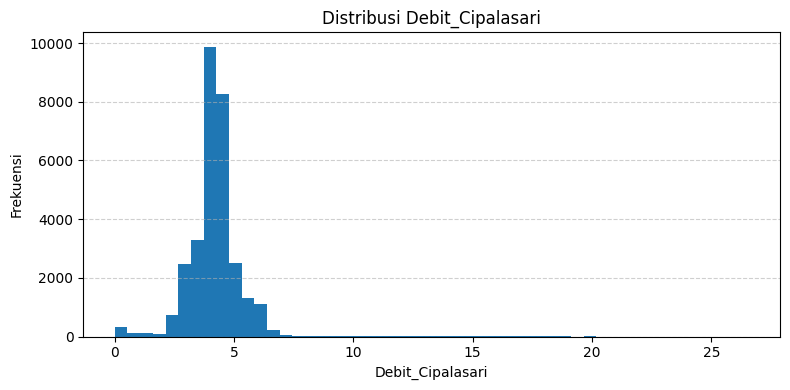

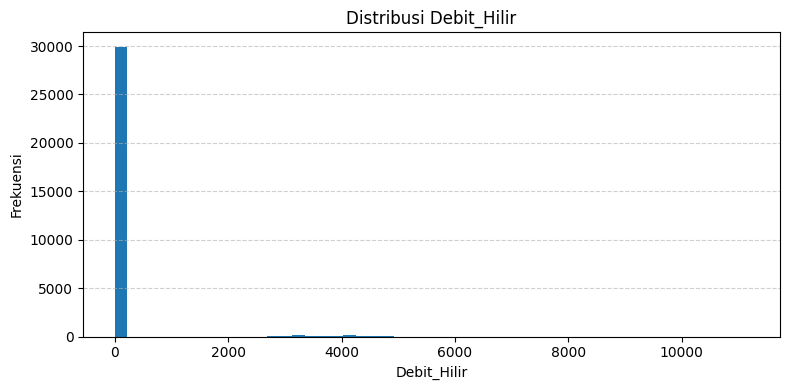

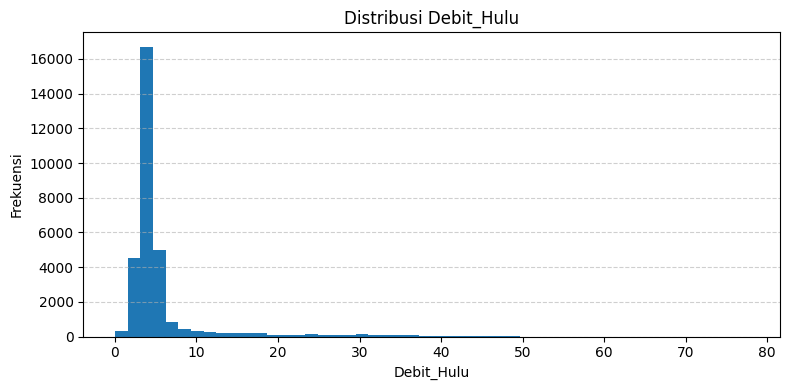

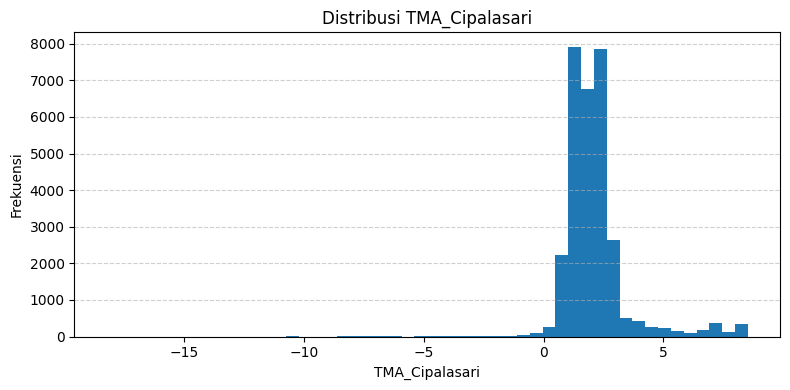

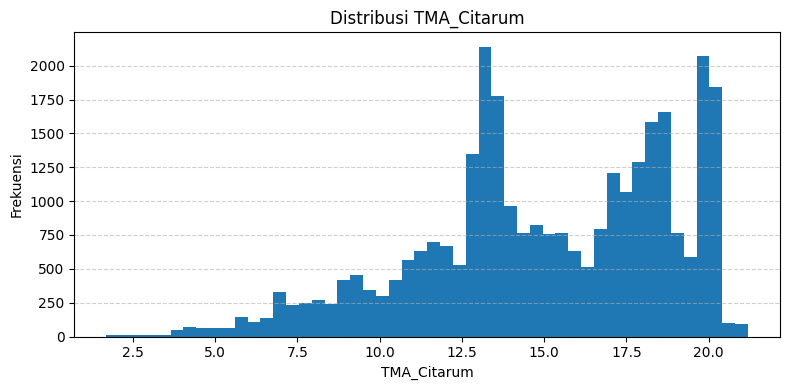

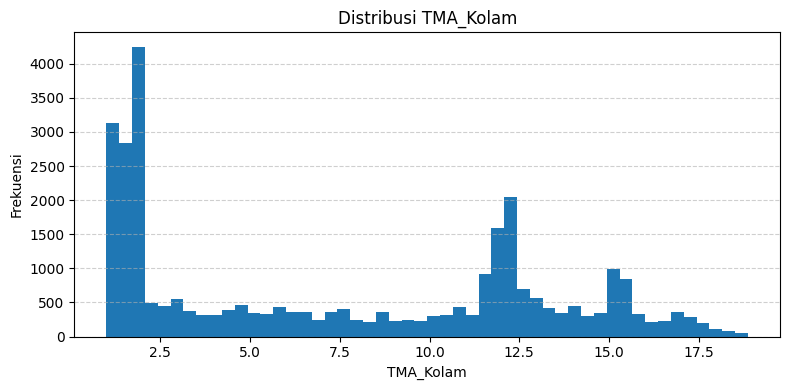

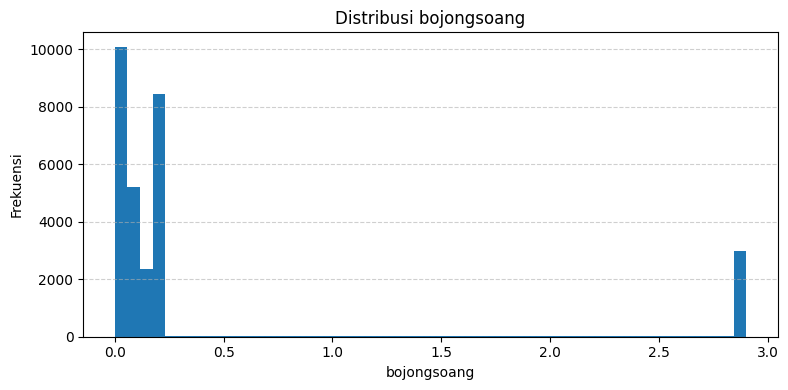

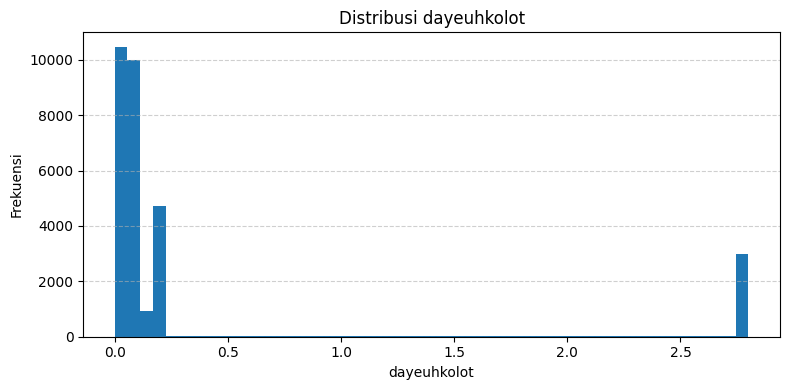

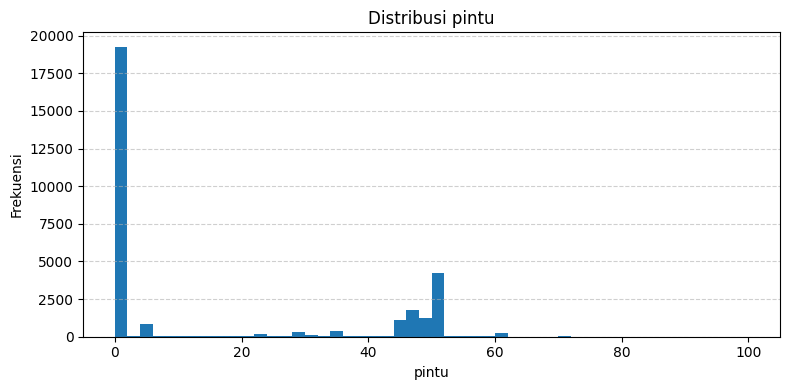

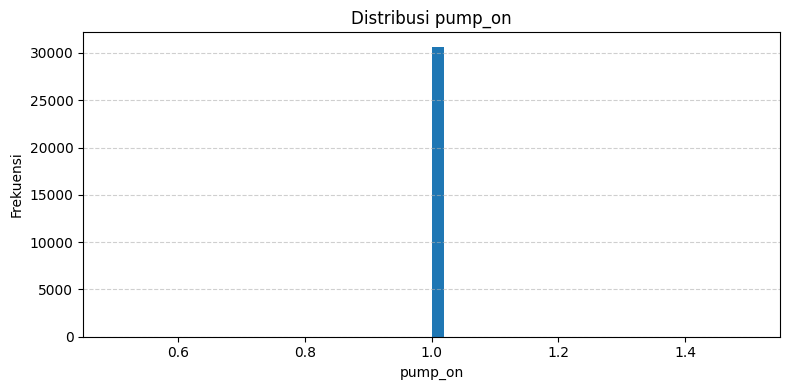

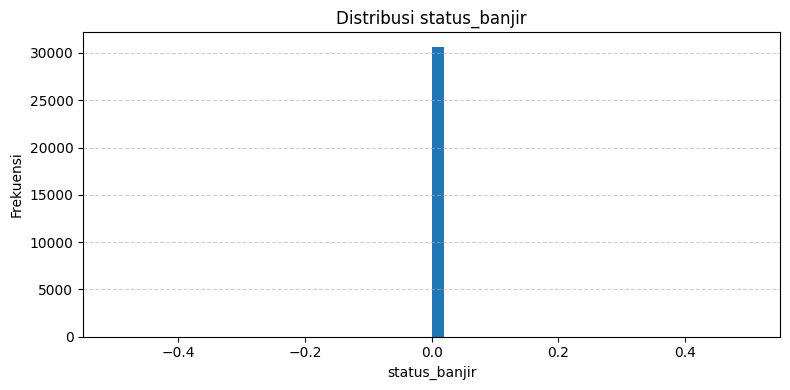

In [40]:
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col].dropna(), bins=50)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


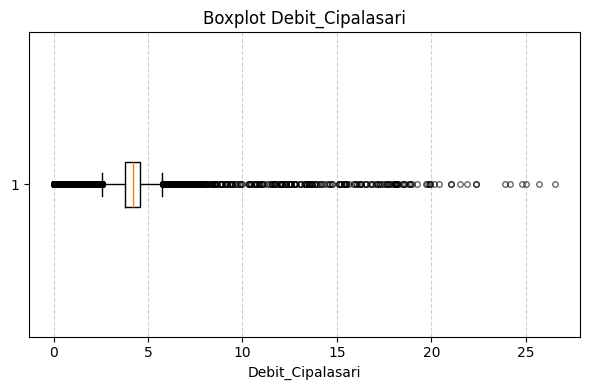

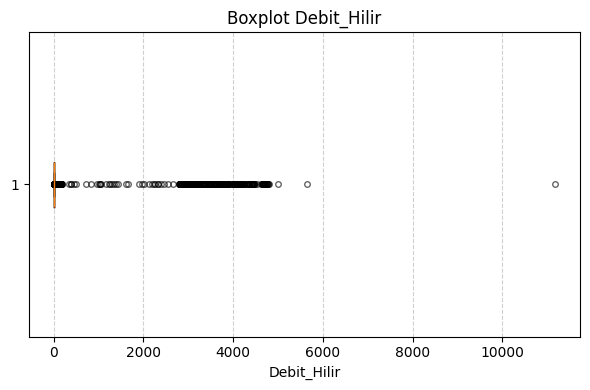

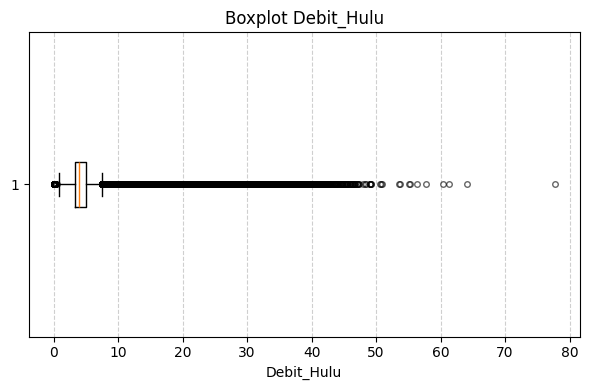

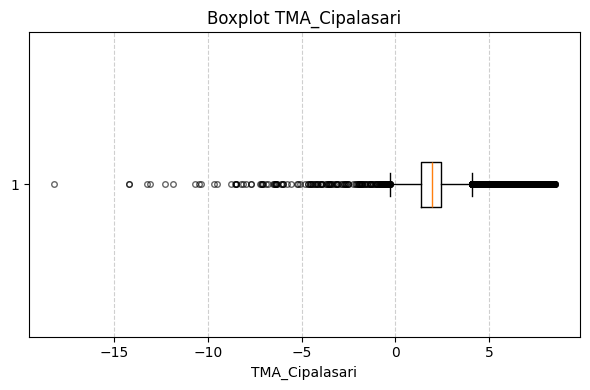

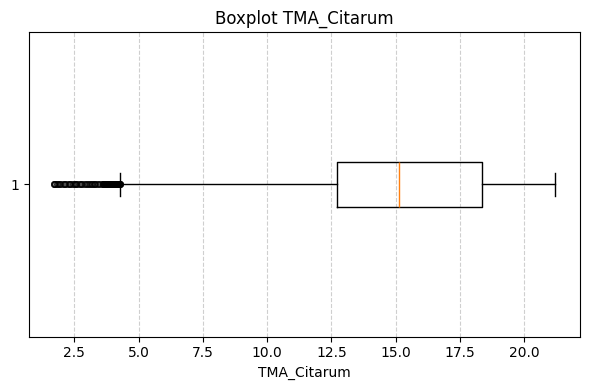

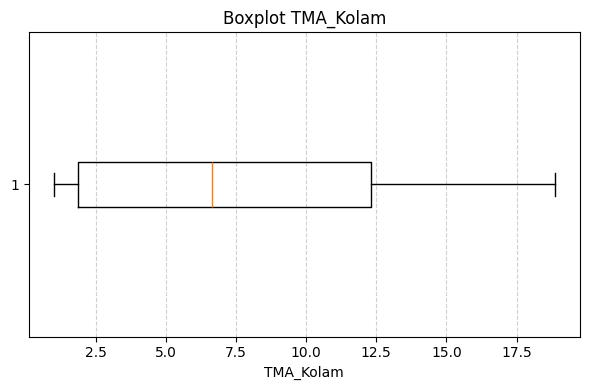

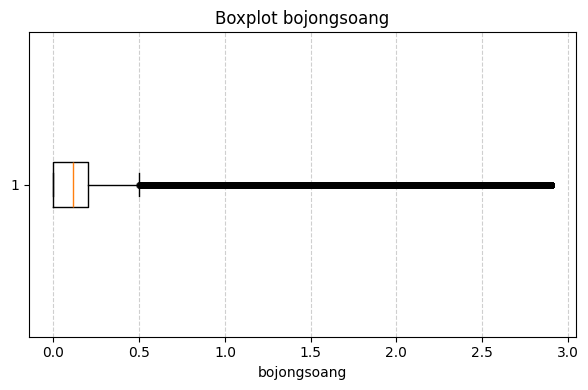

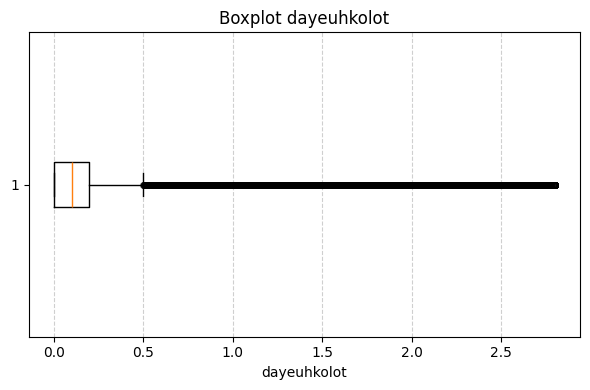

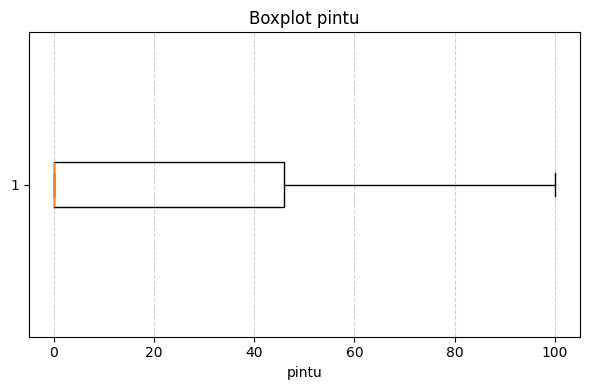

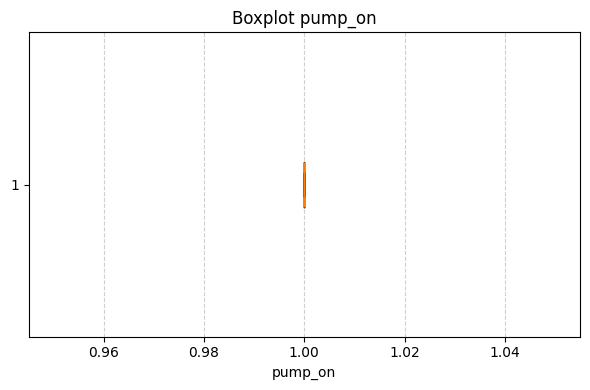

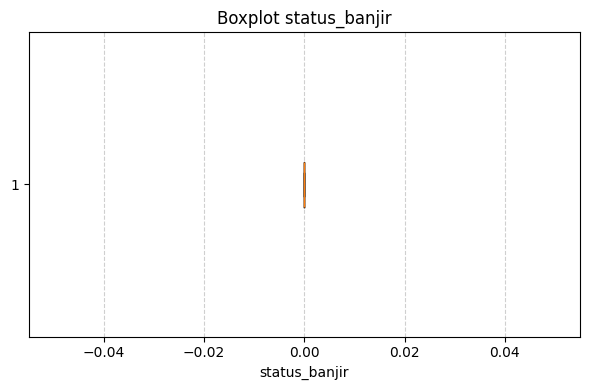

In [41]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col].dropna(), vert=False, showfliers=True,
                flierprops=dict(marker='o', markersize=4, alpha=0.6))
    plt.title(f'Boxplot {col}')
    plt.xlabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

Skewness: -0.6232342645965882
Kurtosis: 3.4655454120119207


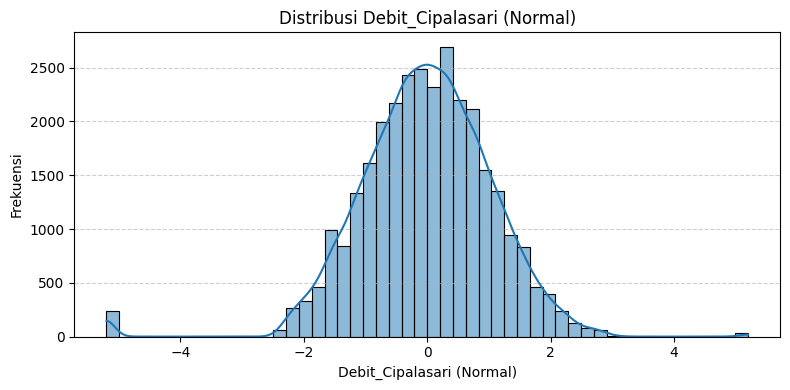

In [42]:
df_copy['Debit_Cipalasari_log'] = np.log1p(df_copy['Debit_Cipalasari'])

lower = df_copy['Debit_Cipalasari_log'].quantile(0.001)
upper = df_copy['Debit_Cipalasari_log'].quantile(0.999)
df_copy['Debit_Cipalasari_clip'] = df_copy['Debit_Cipalasari_log'].clip(lower, upper)

threshold = df_copy['Debit_Cipalasari'].quantile(0.95)
df_copy['high_flow_flag'] = (df_copy['Debit_Cipalasari'] > threshold).astype(int)

qt = QuantileTransformer(output_distribution='normal', random_state=42)
df_copy['Debit_Cipalasari_norm'] = qt.fit_transform(
    df_copy[['Debit_Cipalasari_clip']]
)

print("Skewness:", df_copy['Debit_Cipalasari_norm'].skew())
print("Kurtosis:", df_copy['Debit_Cipalasari_norm'].kurtosis())

plt.figure(figsize=(8, 4))
sns.histplot(df_copy['Debit_Cipalasari_norm'], bins=50, kde=True)
plt.title('Distribusi Debit_Cipalasari (Normal)')
plt.xlabel('Debit_Cipalasari (Normal)')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Skewness: -0.3928238747606475
Kurtosis: 2.677917988448637


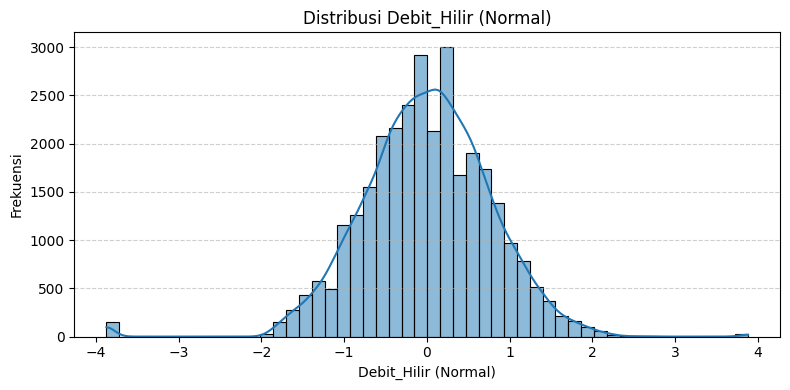

In [43]:
df_copy['Debit_Hilir_log'] = np.log1p(df_copy['Debit_Hilir'])

# 3. Winsorize (clip) pada persentil 0.1%–99.9% untuk membuang noise ekstrem
lower = df_copy['Debit_Hilir_log'].quantile(0.001)
upper = df_copy['Debit_Hilir_log'].quantile(0.999)
df_copy['Debit_Hilir_clip'] = df_copy['Debit_Hilir_log'].clip(lower, upper)

# 4. Buat indikator “high flow” >95 persentil asli
threshold_hilir = df_copy['Debit_Hilir'].quantile(0.95)
df_copy['high_flow_hilir'] = (df_copy['Debit_Hilir'] > threshold_hilir).astype(int)

# 5. QuantileTransformer → paksa distribusi mendekati Gaussian
qt = QuantileTransformer(output_distribution='normal', random_state=42)
df_copy['Debit_Hilir_qt'] = qt.fit_transform(df_copy[['Debit_Hilir_clip']])

# 6. RobustScaler → skala median=0, IQR=1 (tahan outlier tersisa)
rs = RobustScaler()
df_copy['Debit_Hilir_norm'] = rs.fit_transform(df_copy[['Debit_Hilir_qt']])

# 7. Cek skewness & kurtosis pasca‐transformasi
print("Skewness:", df_copy['Debit_Hilir_norm'].skew())
print("Kurtosis:", df_copy['Debit_Hilir_norm'].kurtosis())

plt.figure(figsize=(8, 4))
sns.histplot(df_copy['Debit_Hilir_norm'], bins=50, kde=True)
plt.title('Distribusi Debit_Hilir (Normal)')
plt.xlabel('Debit_Hilir (Normal)')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Skewness: -0.5651986535525978
Kurtosis: 3.2283715426791386


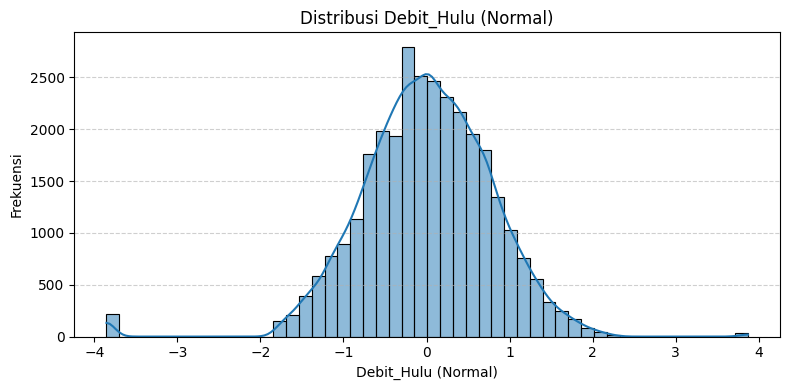

In [44]:
df_copy['Debit_Hulu_log'] = np.log1p(df_copy['Debit_Hulu'])

# 3. Winsorize (clip) pada persentil 0.1%–99.9%
lower = df_copy['Debit_Hulu_log'].quantile(0.001)
upper = df_copy['Debit_Hulu_log'].quantile(0.999)
df_copy['Debit_Hulu_clip'] = df_copy['Debit_Hulu_log'].clip(lower, upper)

# 4. Buat indikator “high flow” (>95 persentil asli)
threshold_hulu = df_copy['Debit_Hulu'].quantile(0.95)
df_copy['high_flow_hulu'] = (df_copy['Debit_Hulu'] > threshold_hulu).astype(int)

# 5. QuantileTransformer → paksa distribusi mendekati Gaussian
qt = QuantileTransformer(output_distribution='normal', random_state=42)
df_copy['Debit_Hulu_qt'] = qt.fit_transform(df_copy[['Debit_Hulu_clip']])

# 6. RobustScaler → skala median=0, IQR=1
rs = RobustScaler()
df_copy['Debit_Hulu_norm'] = rs.fit_transform(df_copy[['Debit_Hulu_qt']])

# 7. Cek skewness & kurtosis pasca‐transformasi
print("Skewness:", df_copy['Debit_Hulu_norm'].skew())
print("Kurtosis:", df_copy['Debit_Hulu_norm'].kurtosis())

plt.figure(figsize=(8, 4))
sns.histplot(df_copy['Debit_Hulu_norm'], bins=50, kde=True)
plt.title('Distribusi Debit_Hulu (Normal)')
plt.xlabel('Debit_Hulu (Normal)')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# EDA dari per-debitan ini hampir sama, karena ketiganya mengekor ke kanan

Skewness: 0.005161027730337363
Kurtosis: 5.40140160321911


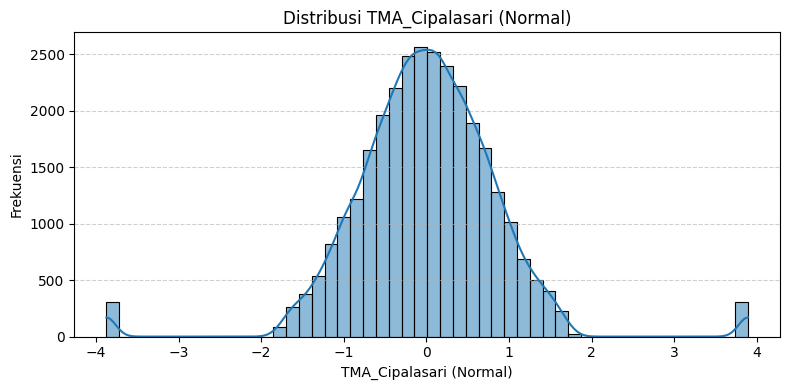

In [46]:
pt = PowerTransformer(method='yeo-johnson', standardize=False)
df_copy['TMA_Cip_pt'] = pt.fit_transform(df_copy[['TMA_Cipalasari']])

# 3. Winsorize pada persentil 1%–99% untuk buang noise ekstrem
low, high = df_copy['TMA_Cip_pt'].quantile([0.01, 0.99])
df_copy['TMA_Cip_clip'] = df_copy['TMA_Cip_pt'].clip(low, high)

# 4. Flag “high tide” (>95-persentil asli)
thr = df_copy['TMA_Cipalasari'].quantile(0.95)
df_copy['high_tide_flag'] = (df_copy['TMA_Cipalasari'] > thr).astype(int)

# 5. QuantileTransformer → distribusi Gaussian
qt = QuantileTransformer(output_distribution='normal', random_state=42)
df_copy['TMA_Cip_qt'] = qt.fit_transform(df_copy[['TMA_Cip_clip']])

# 6. RobustScaler → median=0, IQR=1
rs = RobustScaler()
df_copy['TMA_Cip_norm'] = rs.fit_transform(df_copy[['TMA_Cip_qt']])

# (Opsional) Cek skewness & kurtosis
from scipy.stats import skew, kurtosis
print("Skewness:", skew(df_copy['TMA_Cip_norm']))
print("Kurtosis:", kurtosis(df_copy['TMA_Cip_norm']))

plt.figure(figsize=(8, 4))
sns.histplot(df_copy['TMA_Cip_norm'], bins=50, kde=True)
plt.title('Distribusi TMA_Cipalasari (Normal)')
plt.xlabel('TMA_Cipalasari (Normal)')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Skewness: 0.2463374718382723
Kurtosis: 5.742268178632703


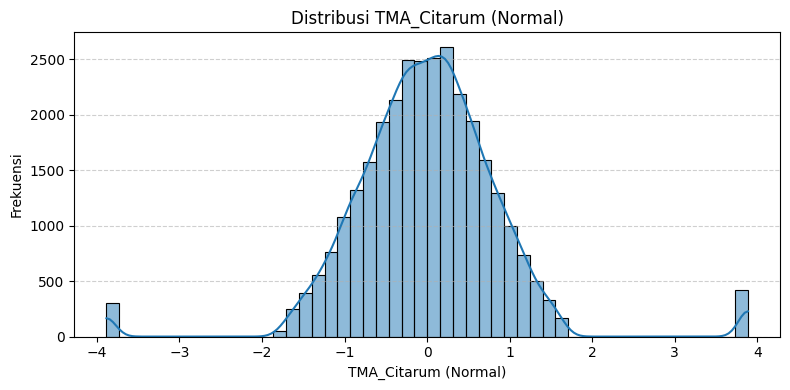

In [47]:
pt = PowerTransformer(method='yeo-johnson', standardize=False)
df_copy['TMA_Cit_pt'] = pt.fit_transform(df_copy[['TMA_Citarum']])

# 3. Winsorize di persentil 1%–99% untuk buang noise ekstrem
low, high = df_copy['TMA_Cit_pt'].quantile([0.01, 0.99])
df_copy['TMA_Cit_clip'] = df_copy['TMA_Cit_pt'].clip(low, high)

# 4. Indikator “high tide” >95-persentil asli
thr_cit = df_copy['TMA_Citarum'].quantile(0.95)
df_copy['high_tide_cit'] = (df_copy['TMA_Citarum'] > thr_cit).astype(int)

# 5. QuantileTransformer → paksa distribusi Gaussian
qt = QuantileTransformer(output_distribution='normal', random_state=42)
df_copy['TMA_Cit_qt'] = qt.fit_transform(df_copy[['TMA_Cit_clip']])

# 6. RobustScaler → median=0, IQR=1
rs = RobustScaler()
df_copy['TMA_Cit_norm'] = rs.fit_transform(df_copy[['TMA_Cit_qt']])

# 7. Verifikasi skewness & kurtosis
print("Skewness:", skew(df_copy['TMA_Cit_norm']))
print("Kurtosis:", kurtosis(df_copy['TMA_Cit_norm']))

plt.figure(figsize=(8, 4))
sns.histplot(df_copy['TMA_Cit_norm'], bins=50, kde=True)
plt.title('Distribusi TMA_Citarum (Normal)')
plt.xlabel('TMA_Citarum (Normal)')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Skewness: -0.0766325079465525
Kurtosis: 5.670925340787665


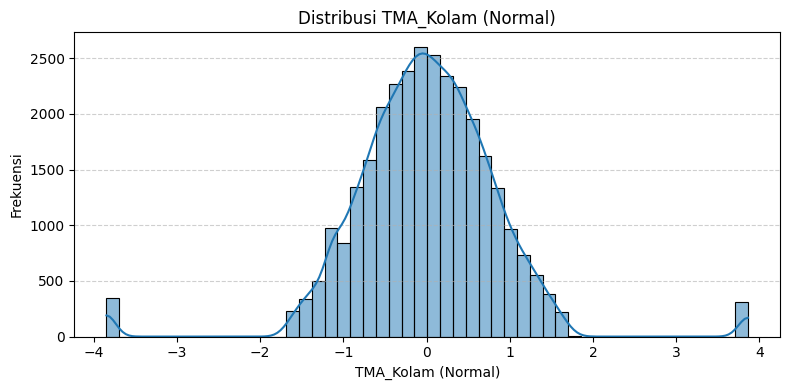

In [48]:
pt = PowerTransformer(method='yeo-johnson', standardize=False)
df_copy['TMA_Kolam_pt'] = pt.fit_transform(df_copy[['TMA_Kolam']])

# 3. Winsorize (clip) pada persentil 1%–99% untuk buang noise ekstrem
low, high = df_copy['TMA_Kolam_pt'].quantile([0.01, 0.99])
df_copy['TMA_Kolam_clip'] = df_copy['TMA_Kolam_pt'].clip(low, high)

# 4. Indikator “high water” (>95-persentil asli)
thr_kolam = df_copy['TMA_Kolam'].quantile(0.95)
df_copy['high_water_flag'] = (df_copy['TMA_Kolam'] > thr_kolam).astype(int)

# 5. QuantileTransformer → memaksa distribusi mendekati Gaussian
qt = QuantileTransformer(output_distribution='normal', random_state=42)
df_copy['TMA_Kolam_qt'] = qt.fit_transform(df_copy[['TMA_Kolam_clip']])

# 6. RobustScaler → median=0, IQR=1, tahan outlier tersisa
rs = RobustScaler()
df_copy['TMA_Kolam_norm'] = rs.fit_transform(df_copy[['TMA_Kolam_qt']])

# 7. Cek skewness & kurtosis pasca‐transformasi
print("Skewness:", skew(df_copy['TMA_Kolam_norm']))
print("Kurtosis:", kurtosis(df_copy['TMA_Kolam_norm']))

plt.figure(figsize=(8, 4))
sns.histplot(df_copy['TMA_Kolam_norm'], bins=50, kde=True)
plt.title('Distribusi TMA_Kolam (Normal)')
plt.xlabel('TMA_Kolam (Normal)')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Skewness: -0.08194453785254652
Kurtosis: -0.47729809375787724


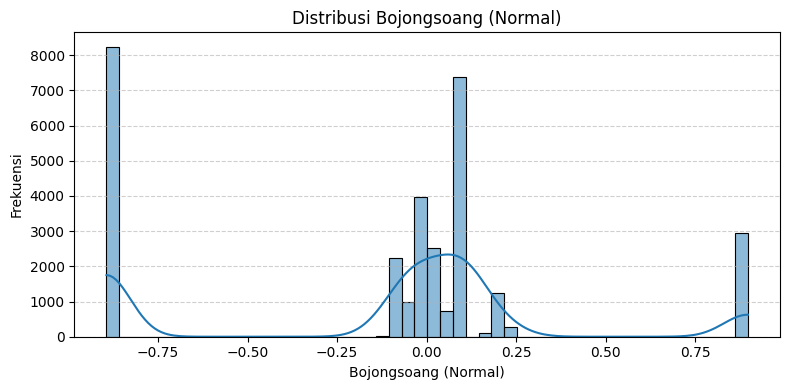

In [49]:
df_copy['bojongsoang_log'] = np.log1p(df_copy['bojongsoang'])

# 2. Winsorize (clip) pada persentil 0.1%–99.9% untuk buang noise ekstrem
lower = df_copy['bojongsoang_log'].quantile(0.001)
upper = df_copy['bojongsoang_log'].quantile(0.999)
df_copy['bojongsoang_clip'] = df_copy['bojongsoang_log'].clip(lower, upper)

# 3. Indikator peristiwa hujan besar (>95 persentil asli)
threshold_bojong = df_copy['bojongsoang'].quantile(0.95)
df_copy['rain_flag_bojong'] = (df_copy['bojongsoang'] > threshold_bojong).astype(int)

# 4. QuantileTransformer → paksa distribusi mendekati Gaussian
qt = QuantileTransformer(output_distribution='normal', random_state=42)
df_copy['bojongsoang_qt'] = qt.fit_transform(df_copy[['bojongsoang_clip']])

# 5. RobustScaler → skala median=0, IQR=1 (tahan outlier tersisa)
rs = RobustScaler()
df_copy['bojongsoang_norm'] = rs.fit_transform(df_copy[['bojongsoang_qt']])

# 6. Verifikasi skewness & kurtosis pasca‐transformasi
print("Skewness:", skew(df_copy['bojongsoang_norm']))
print("Kurtosis:", kurtosis(df_copy['bojongsoang_norm']))

plt.figure(figsize=(8, 4))
sns.histplot(df_copy['bojongsoang_norm'], bins=50, kde=True)
plt.title('Distribusi Bojongsoang (Normal)')
plt.xlabel('Bojongsoang (Normal)')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Skewness: -0.0846266843755107
Kurtosis: -0.4815101785693505


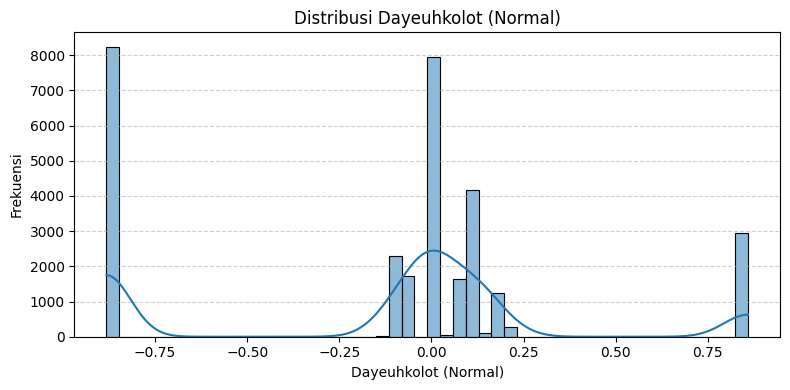

In [50]:
df_copy['dayeuhkolot_log'] = np.log1p(df_copy['dayeuhkolot'])

# 2. Winsorize (clip) pada persentil 0.1%–99.9%
lower = df_copy['dayeuhkolot_log'].quantile(0.001)
upper = df_copy['dayeuhkolot_log'].quantile(0.999)
df_copy['dayeuhkolot_clip'] = df_copy['dayeuhkolot_log'].clip(lower, upper)

# 3. Indikator peristiwa hujan besar (>95-persentil asli)
thr_day = df_copy['dayeuhkolot'].quantile(0.95)
df_copy['rain_flag_day'] = (df_copy['dayeuhkolot'] > thr_day).astype(int)

# 4. QuantileTransformer → paksa distribusi mendekati Gaussian
qt = QuantileTransformer(output_distribution='normal', random_state=42)
df_copy['dayeuhkolot_qt'] = qt.fit_transform(df_copy[['dayeuhkolot_clip']])

# 5. RobustScaler → skala median=0, IQR=1 (tahan outlier sisa)
rs = RobustScaler()
df_copy['dayeuhkolot_norm'] = rs.fit_transform(df_copy[['dayeuhkolot_qt']])

# 6. Verifikasi skewness & kurtosis pasca‐transformasi
print("Skewness:", skew(df_copy['dayeuhkolot_norm']))
print("Kurtosis:", kurtosis(df_copy['dayeuhkolot_norm']))

plt.figure(figsize=(8, 4))
sns.histplot(df_copy['dayeuhkolot_norm'], bins=50, kde=True)
plt.title('Distribusi Dayeuhkolot (Normal)')
plt.xlabel('Dayeuhkolot (Normal)')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# selesai yang perlu di luruskan distribusi penyebarannya

In [57]:
df_copy.drop('timestamp', axis=1, inplace=True)
df_copy.head()

,Debit_Cipalasari,Debit_Hilir,Debit_Hulu,Pump1,Pump2,Pump3,TMA_Cipalasari,TMA_Citarum,TMA_Kolam,bojongsoang,...,bojongsoang_log,bojongsoang_clip,rain_flag_bojong,bojongsoang_qt,bojongsoang_norm,dayeuhkolot_log,dayeuhkolot_clip,rain_flag_day,dayeuhkolot_qt,dayeuhkolot_norm
0,0.466032,2.389919,1.819317,on,on,off,0.634561,6.569780,12.875024,0.0,...,0.0,0.0,0,-5.199338,-0.89437,0.0,0.0,0,-5.199338,-0.881862
1,0.470409,2.398388,1.836405,on,on,off,0.629908,6.559635,12.874414,0.0,...,0.0,0.0,0,-5.199338,-0.89437,0.0,0.0,0,-5.199338,-0.881862
2,0.479342,2.415673,1.871278,on,on,off,0.620411,6.538929,12.873169,0.0,...,0.0,0.0,0,-5.199338,-0.89437,0.0,0.0,0,-5.199338,-0.881862
3,0.488275,2.432957,1.906150,on,on,off,0.610914,6.518223,12.871923,0.0,...,0.0,0.0,0,-5.199338,-0.89437,0.0,0.0,0,-5.199338,-0.881862
4,0.497208,2.450241,1.941023,on,on,off,0.601418,6.497517,12.870678,0.0,...,0.0,0.0,0,-5.199338,-0.89437,0.0,0.0,0,-5.199338,-0.881862


In [63]:
keep_cols = [
    # Fitur hidrologi dan klimatologi (hasil transformasi)
    'TMA_Cip_norm', 'TMA_Cit_norm', 'TMA_Kolam_norm',
    'Debit_Cipalasari_norm', 'Debit_Hilir_norm', 'Debit_Hulu_norm',
    'bojongsoang_norm', 'dayeuhkolot_norm',
    # Indikator ekstrim
    'high_flow_flag', 'high_flow_hilir', 'high_flow_hulu',
    'high_tide_flag', 'high_tide_cit', 'high_water_flag',
    'rain_flag_bojong', 'rain_flag_day',
    # Target klasifikasi siaga banjir
    'status_banjir',
    # Kolom pump hasil agregasi (aman/siaga1/siaga2/siaga3)
    'pump', 'Pump_1', 'Pump_2', 'Pump_3',
]

# Cari kolom yang tidak masuk dalam keep_cols
cols_to_drop = [c for c in df_copy.columns if c not in keep_cols]

# Drop kolom‐kolom tidak terpakai
df_copy.drop(columns=cols_to_drop, inplace=True)

# Verifikasi
print("Kolom yang tersisa:", df_copy.columns.tolist())

Kolom yang tersisa: ['status_banjir', 'high_flow_flag', 'Debit_Cipalasari_norm', 'high_flow_hilir', 'Debit_Hilir_norm', 'high_flow_hulu', 'Debit_Hulu_norm', 'high_tide_flag', 'TMA_Cip_norm', 'high_tide_cit', 'TMA_Cit_norm', 'high_water_flag', 'TMA_Kolam_norm', 'rain_flag_bojong', 'bojongsoang_norm', 'rain_flag_day', 'dayeuhkolot_norm']
